# Import necessary packages

In [2]:
using Pkg; Pkg.activate(".")
using Plots, LaTeXStrings
using Graphs
using YardSale

  Activating project at `d:\Gits\YardSale.jl\tutorials`


# Overview of the notebook
We'll explore briefly the functionalities of the MC simulations; particularly, we want to show how to use different callbacks functions to monitor the simulation.

We can start by defining the basic parameters of the simulation, such as the number of agentes, mean wealth, $\chi$ and $\zeta$ parameters, and the number of steps.

In [2]:
N = 128
W_N = 1.0f0
chi = 0.75f0
zeta = 1.0f0
f = 0.01f0
steps = 20000 * N
seed = 42

42

# Simulations using callbacks

For the callbacks, the function `EYSM_base_callbacks` is defined to incorporate callbacks. 
In general, callbacks must be functions that receive the wealth distribution at time $t$ and return some metric of interest (which can be a number, a vector, etc.).
The functions must be passed as a dictionary, where the key is a symbol that identifies the callback and the value is the function itself.
In this example, we'll use the following callbacks:
- `gini`: computes the Gini coefficient of the wealth distribution.
- `x1`: computes the relative wealth of the richest agent.
- `lorenz`: computes the Lorenz curve of the wealth distribution.	

All this functions are defined inside the package. Of course, you can define your own functions and pass them to the simulation.

After defining the callbacks, we can choose between get the whole history of the wealth distribution, or just the metrics of interes. This is done by setting the `callbacks_only` parameter to `True` or `False`.

In [3]:
callbacks = Dict(:gini => YardSale.get_gini, :x1 => YardSale.get_x1,:lorenz => YardSale.get_lorenz)
callbacks_only = true

true

In [4]:
# Run the simulation
results = EYSM_base_callbacks(N, W_N, chi, zeta, f, steps, seed; callbacks=callbacks, callbacks_only=callbacks_only)

Dict{Symbol, AbstractVector} with 3 entries:
  :lorenz => Vector{Float32}[[0.0078125, 0.015625, 0.0234375, 0.03125, 0.039062…
  :gini   => Float32[0.0, 0.0852903, 0.111675, 0.136057, 0.157808, 0.177768, 0.…
  :x1     => Float32[0.0078125, 0.0107773, 0.0111418, 0.0135276, 0.0133853, 0.0…

For the end, we can plot the results from the callbacks.

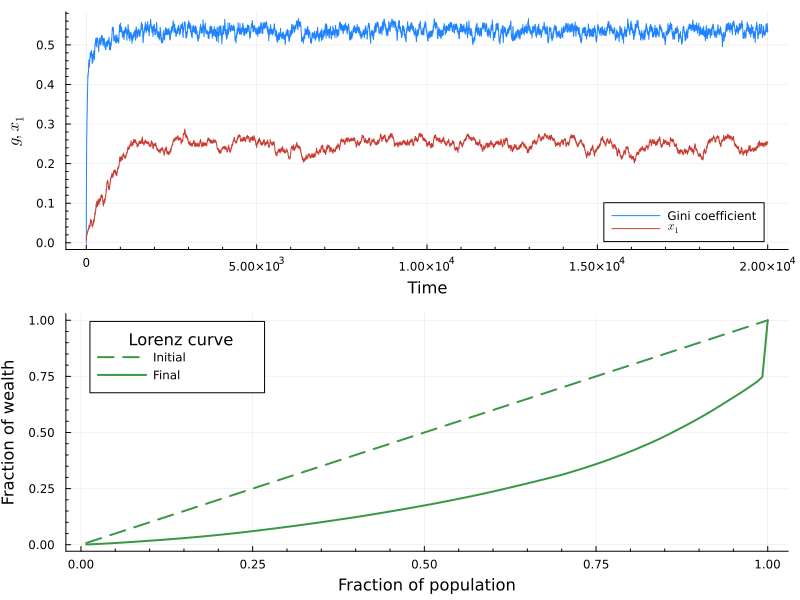

In [5]:
p1 = plot(results[:gini], label="Gini coefficient",minorticks=true,palette=:julia,
        xlabel="Time", ylabel=L"g,x_1")
plot!(p1, results[:x1], label=L"x_1",minorticks=true,palette=:julia)

p2 = plot(
    (1:N) ./ N, results[:lorenz][1],color=3, ls=:dash, label="Initial",
    minorticks=true,palette=:julia, legend_title="Lorenz curve",
    xlabel="Fraction of population", ylabel="Fraction of wealth",lw=2

    )
plot!(p2, (1:N) ./ N, results[:lorenz][end],color=3, label="Final", lw=2)

p = plot(p1, p2, layout=(2,1), size=(800, 600))
display(p)

# Callbacks in MC simulations over networks

We can also run the MC simulations over networks. In this case, we can use the same 
callbacks as before, but we can also use the `EYSM_net_callbacks` function. Let's test this
function over a Erdös-Rényi network.

For this demonstration, we'll use a fragmented network, to show that the function can handle
this kind of network, leaving the isolated nodes out of the simulation, and only considering
the giant component.

In [3]:
N = 128
k_mean = 8
# Seed for the disconnected random graph (check disconnection with is_connected(g))
seed_er = 10
g = erdos_renyi(N, k_mean/(N-1), seed = seed_er)

println("Is connected: ", is_connected(g))

Is connected: false


In [4]:
# Simulation parameters
W_N = 1.0f0
interaction_mode = "A"
taxation_mode = "A"
chi = 0.10f0
zeta = 1.0f0
f = 0.01f0
steps = 20000 * N
seed = 42


callbacks = Dict(:gini => YardSale.get_gini, :x1 => YardSale.get_x1,:lorenz => YardSale.get_lorenz)
callbacks_only = false
;

In [6]:
# Run the simulation
w_t, callback_results = EYSM_net_callbacks(
    g,W_N,interaction_mode,taxation_mode,chi,zeta,f,steps,seed;
    callbacks=callbacks,callbacks_only=callbacks_only
)
;

┌ Warning: The graph has a giant component of 127 nodes.
│         The original graph has 128 nodes.
│         We will use the giant component for the simulation.
└ @ YardSale C:\Users\Nico\.julia\packages\YardSale\DqbVW\src\utils\graph_functions.jl:26


Now we plot the results from the callbacks for the network simulation.

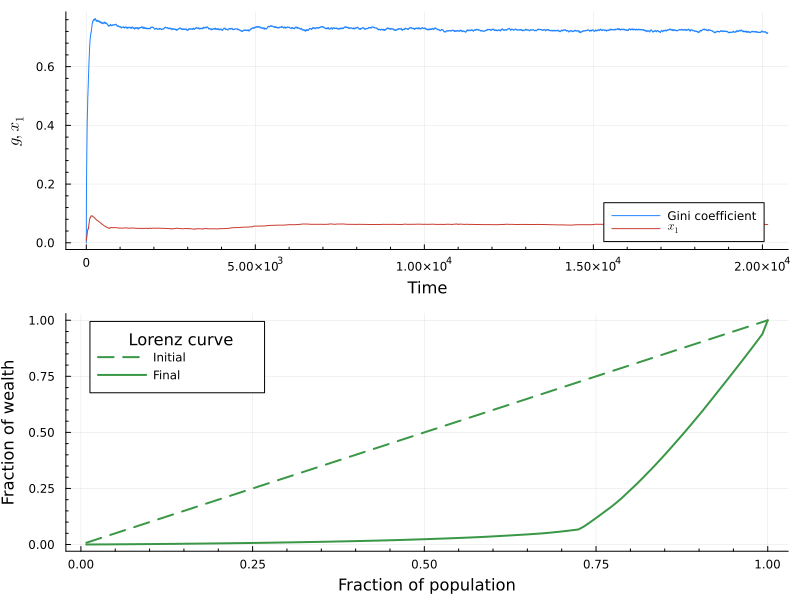

In [19]:
p1 = plot(callback_results[:gini], label="Gini coefficient",minorticks=true,palette=:julia,
        xlabel="Time", ylabel=L"g,x_1")
plot!(p1, callback_results[:x1], label=L"x_1",minorticks=true,palette=:julia)

p2 = plot(
    (1:127) ./ 127, callback_results[:lorenz][1],color=3, ls=:dash, label="Initial",
    minorticks=true,palette=:julia, legend_title="Lorenz curve",
    xlabel="Fraction of population", ylabel="Fraction of wealth",lw=2

    )
plot!(p2, (1:127) ./ 127 , callback_results[:lorenz][end],color=3, label="Final", lw=2)

p = plot(p1, p2, layout=(2,1), size=(800, 600))
display(p)